# Project:-
## Prediction And Providing Medication For Thyroid Using Machine Learning

## Target Metadata

The diagnosis consists of a string of letters indicating diagnosed conditions.

Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic                                         
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones

## Agenda of the Project....

1.  Data Collection.
2.  Data Preperation.
3.  Cleaning the Data & Exploratory Data Analysis.
4.  Spliting the Data.
5.  Applying Model{Algorithums) & Predicting the Output.
6.  Deployment of model.

## 1.) Data Collection:

### 1.1 ) Importing Required Libraries.

In [380]:
import os
import numpy as np
import pandas as pd
import random
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import contextmanager
from time import time
from tqdm import tqdm
import lightgbm as lgbm
import category_encoders as ce

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

### 1.2 ) Importing Dataset & Displaying Data.
**Note:-** This dataset is a **CSV** file formate so that for the inporting this dataset we are using **read_csv** method.

In [381]:
thyroid = pd.read_csv(r"C:\Users\vedav\Desktop\major_thyroid\thyroidDF_new.csv")

In [382]:
thyroid

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.00,f,NaN,f,NaN,f,NaN,other,-
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-
4,32.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,51.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.2,t,100.0,f,0.94,t,106.0,f,0.0,NaN,2.8,NaN,H
12964,50.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,5.5,t,68.0,f,0.67,t,101.0,f,0.0,NaN,2.4,NaN,H
12965,73.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,3.3,t,67.0,f,0.96,t,70.0,f,0.0,NaN,2.1,NaN,H
12966,66.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.4,t,72.0,f,0.85,t,85.0,f,0.0,NaN,2.7,NaN,H


In [383]:
pd.set_option('display.max_columns', None)
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-
4,32.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S


## 2.) Data Preperation:

In [263]:
thyroid.shape

(12968, 30)

In [264]:
thyroid.size

389040

In [265]:
thyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target'],
      dtype='object')

In [266]:
thyroid.dtypes  

age                    float64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
dtype: object

In [267]:
thyroid.memory_usage() 

Index                     128
age                    103744
sex                    103744
on_thyroxine           103744
query_on_thyroxine     103744
on_antithyroid_meds    103744
sick                   103744
pregnant               103744
thyroid_surgery        103744
I131_treatment         103744
query_hypothyroid      103744
query_hyperthyroid     103744
lithium                103744
goitre                 103744
tumor                  103744
hypopituitary          103744
psych                  103744
TSH_measured           103744
TSH                    103744
T3_measured            103744
T3                     103744
TT4_measured           103744
TT4                    103744
T4U_measured           103744
T4U                    103744
FTI_measured           103744
FTI                    103744
TBG_measured           103744
TBG                    103744
referral_source        103744
target                 103744
dtype: int64

In [268]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12968 entries, 0 to 12967
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12967 non-null  float64
 1   sex                  12511 non-null  object 
 2   on_thyroxine         12968 non-null  object 
 3   query_on_thyroxine   12968 non-null  object 
 4   on_antithyroid_meds  12968 non-null  object 
 5   sick                 12968 non-null  object 
 6   pregnant             12968 non-null  object 
 7   thyroid_surgery      12968 non-null  object 
 8   I131_treatment       12968 non-null  object 
 9   query_hypothyroid    12968 non-null  object 
 10  query_hyperthyroid   12968 non-null  object 
 11  lithium              12968 non-null  object 
 12  goitre               12968 non-null  object 
 13  tumor                12968 non-null  object 
 14  hypopituitary        12968 non-null  object 
 15  psych                12968 non-null 

## 3.) Data Cleaning & EDA:

In [269]:
# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'Primary hypothyroid', 
             'F': 'Primary hypothyroid', 
             'G': 'Compensated hypothyroid', 
             'H': 'Secondary hypothyroid'}
thyroid['target'] = thyroid['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping 

In [270]:
thyroid.dropna(subset=['target'], inplace=True)
thyroid

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.00,f,NaN,f,NaN,f,NaN,other,negative
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,negative
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,negative
5,60.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,51.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.2,t,100.0,f,0.94,t,106.0,f,0.0,NaN,2.8,NaN,Secondary hypothyroid
12964,50.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,5.5,t,68.0,f,0.67,t,101.0,f,0.0,NaN,2.4,NaN,Secondary hypothyroid
12965,73.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,3.3,t,67.0,f,0.96,t,70.0,f,0.0,NaN,2.1,NaN,Secondary hypothyroid
12966,66.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.4,t,72.0,f,0.85,t,85.0,f,0.0,NaN,2.7,NaN,Secondary hypothyroid


In [271]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,negative
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,negative
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,negative
5,60.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,negative


In [272]:
thyroid.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
12963,51.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.2,t,100.0,f,0.94,t,106.0,f,0.0,NaN,2.8,NaN,Secondary hypothyroid
12964,50.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,5.5,t,68.0,f,0.67,t,101.0,f,0.0,NaN,2.4,NaN,Secondary hypothyroid
12965,73.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,3.3,t,67.0,f,0.96,t,70.0,f,0.0,NaN,2.1,NaN,Secondary hypothyroid
12966,66.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.4,t,72.0,f,0.85,t,85.0,f,0.0,NaN,2.7,NaN,Secondary hypothyroid
12967,74.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.8,t,127.0,f,1.06,t,120.0,f,0.0,NaN,3.3,NaN,Secondary hypothyroid


In [273]:
thyroid.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis = 1,inplace = True)

In [274]:
thyroid.drop(['referral_source'],axis = 1,inplace = True)

In [275]:
thyroid.drop(['psych','sick'],axis = 1,inplace = True)

In [276]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11342 entries, 0 to 12967
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11341 non-null  float64
 1   sex                  10942 non-null  object 
 2   on_thyroxine         11342 non-null  object 
 3   query_on_thyroxine   11342 non-null  object 
 4   on_antithyroid_meds  11342 non-null  object 
 5   pregnant             11342 non-null  object 
 6   thyroid_surgery      11342 non-null  object 
 7   I131_treatment       11342 non-null  object 
 8   query_hypothyroid    11342 non-null  object 
 9   query_hyperthyroid   11342 non-null  object 
 10  lithium              11342 non-null  object 
 11  goitre               11342 non-null  object 
 12  tumor                11342 non-null  object 
 13  hypopituitary        11342 non-null  object 
 14  TSH                  10251 non-null  float64
 15  T3                   8364 non-null  

In [277]:
thyroid.isnull().sum()

age                        1
sex                      400
on_thyroxine               0
query_on_thyroxine         0
on_antithyroid_meds        0
pregnant                   0
thyroid_surgery            0
I131_treatment             0
query_hypothyroid          0
query_hyperthyroid         0
lithium                    0
goitre                     0
tumor                      0
hypopituitary              0
TSH                     1091
T3                      2978
TT4                      585
T4U                     1063
FTI                     1054
TBG                    11059
target                     0
dtype: int64

In [278]:
thyroid.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,11341.000000,10251.000000,8364.000000,10757.000000,10279.000000,10288.000000,283.000000
mean,69.212503,5.305740,2.310051,105.996427,1.223522,110.280190,21.252120
std,1064.816540,25.542044,5.792549,33.982956,5.214760,35.836685,8.083122
min,1.000000,0.005000,0.050000,0.370000,0.190000,0.000000,0.100000
25%,37.000000,0.520000,1.600000,87.000000,0.870000,93.000000,18.000000
50%,54.000000,1.400000,2.000000,103.000000,0.970000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,122.000000,1.070000,125.000000,27.000000
max,65526.000000,530.000000,204.000000,430.000000,151.000000,839.000000,45.000000


### 3.2) Visualizing the Data.

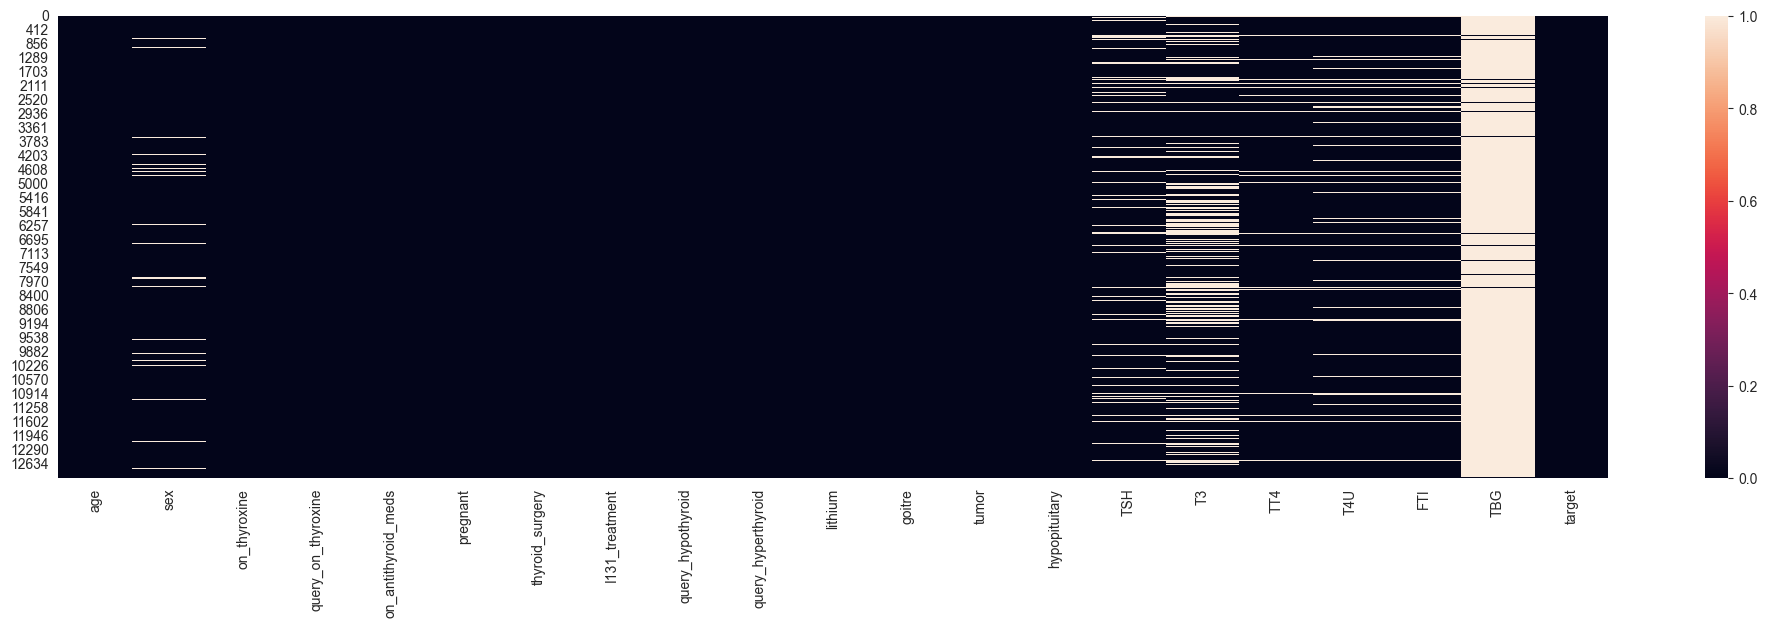

In [279]:
plt.figure(figsize=(25,6))
sns.heatmap(thyroid.isnull())
plt.show()

Now, In above cell by the **"isnull()"** function we are calculating any missing values in our dataset where we can remove and add values as per our requirement for better output.

Here, we can see **sex**, **TSH**,**T3**,**TT4**,**T4U**,**FTI**,**TBG** feature have null values. 

In [280]:
thyroid['target'].value_counts()

negative                   10252
Compensated hypothyroid      553
Primary hypothyroid          329
hyperthyroid                 182
Secondary hypothyroid         26
Name: target, dtype: int64

<Axes: >

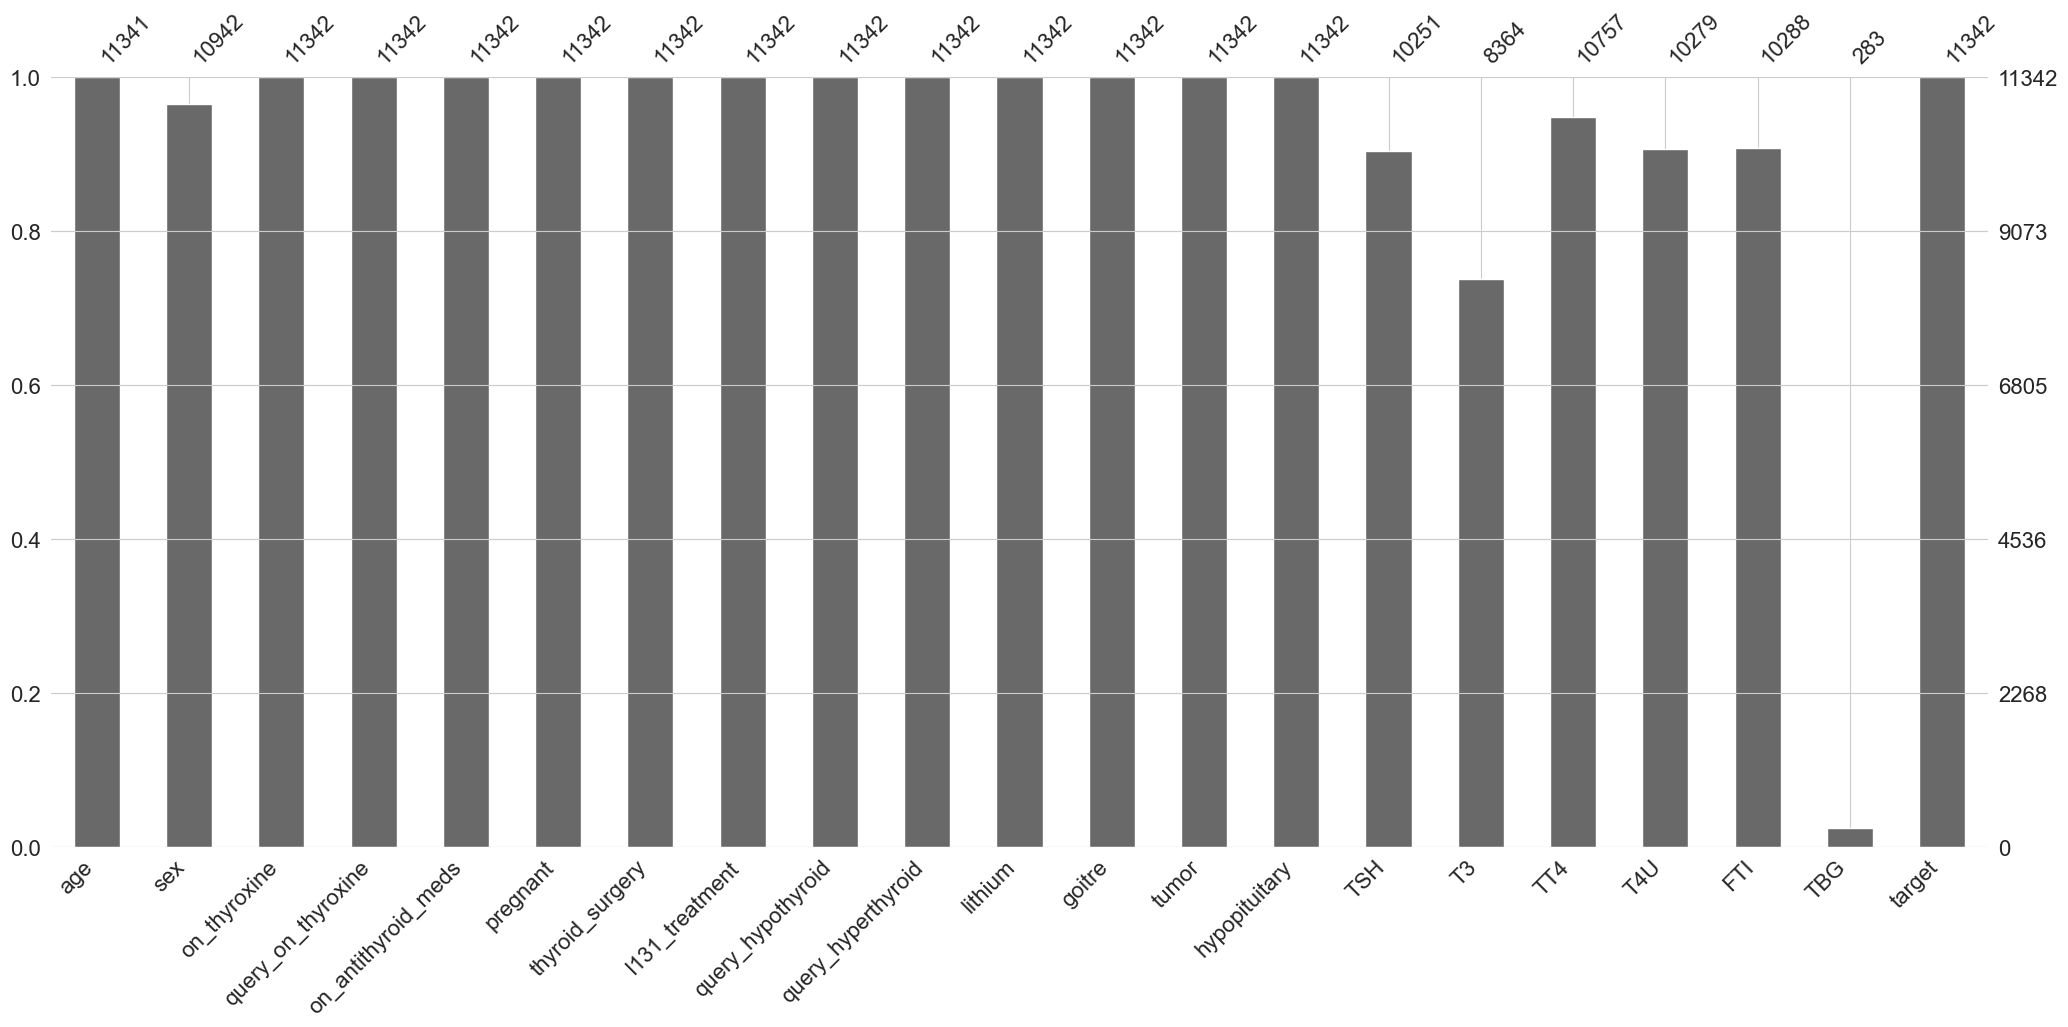

In [281]:
import missingno as msno
msno.bar(thyroid)

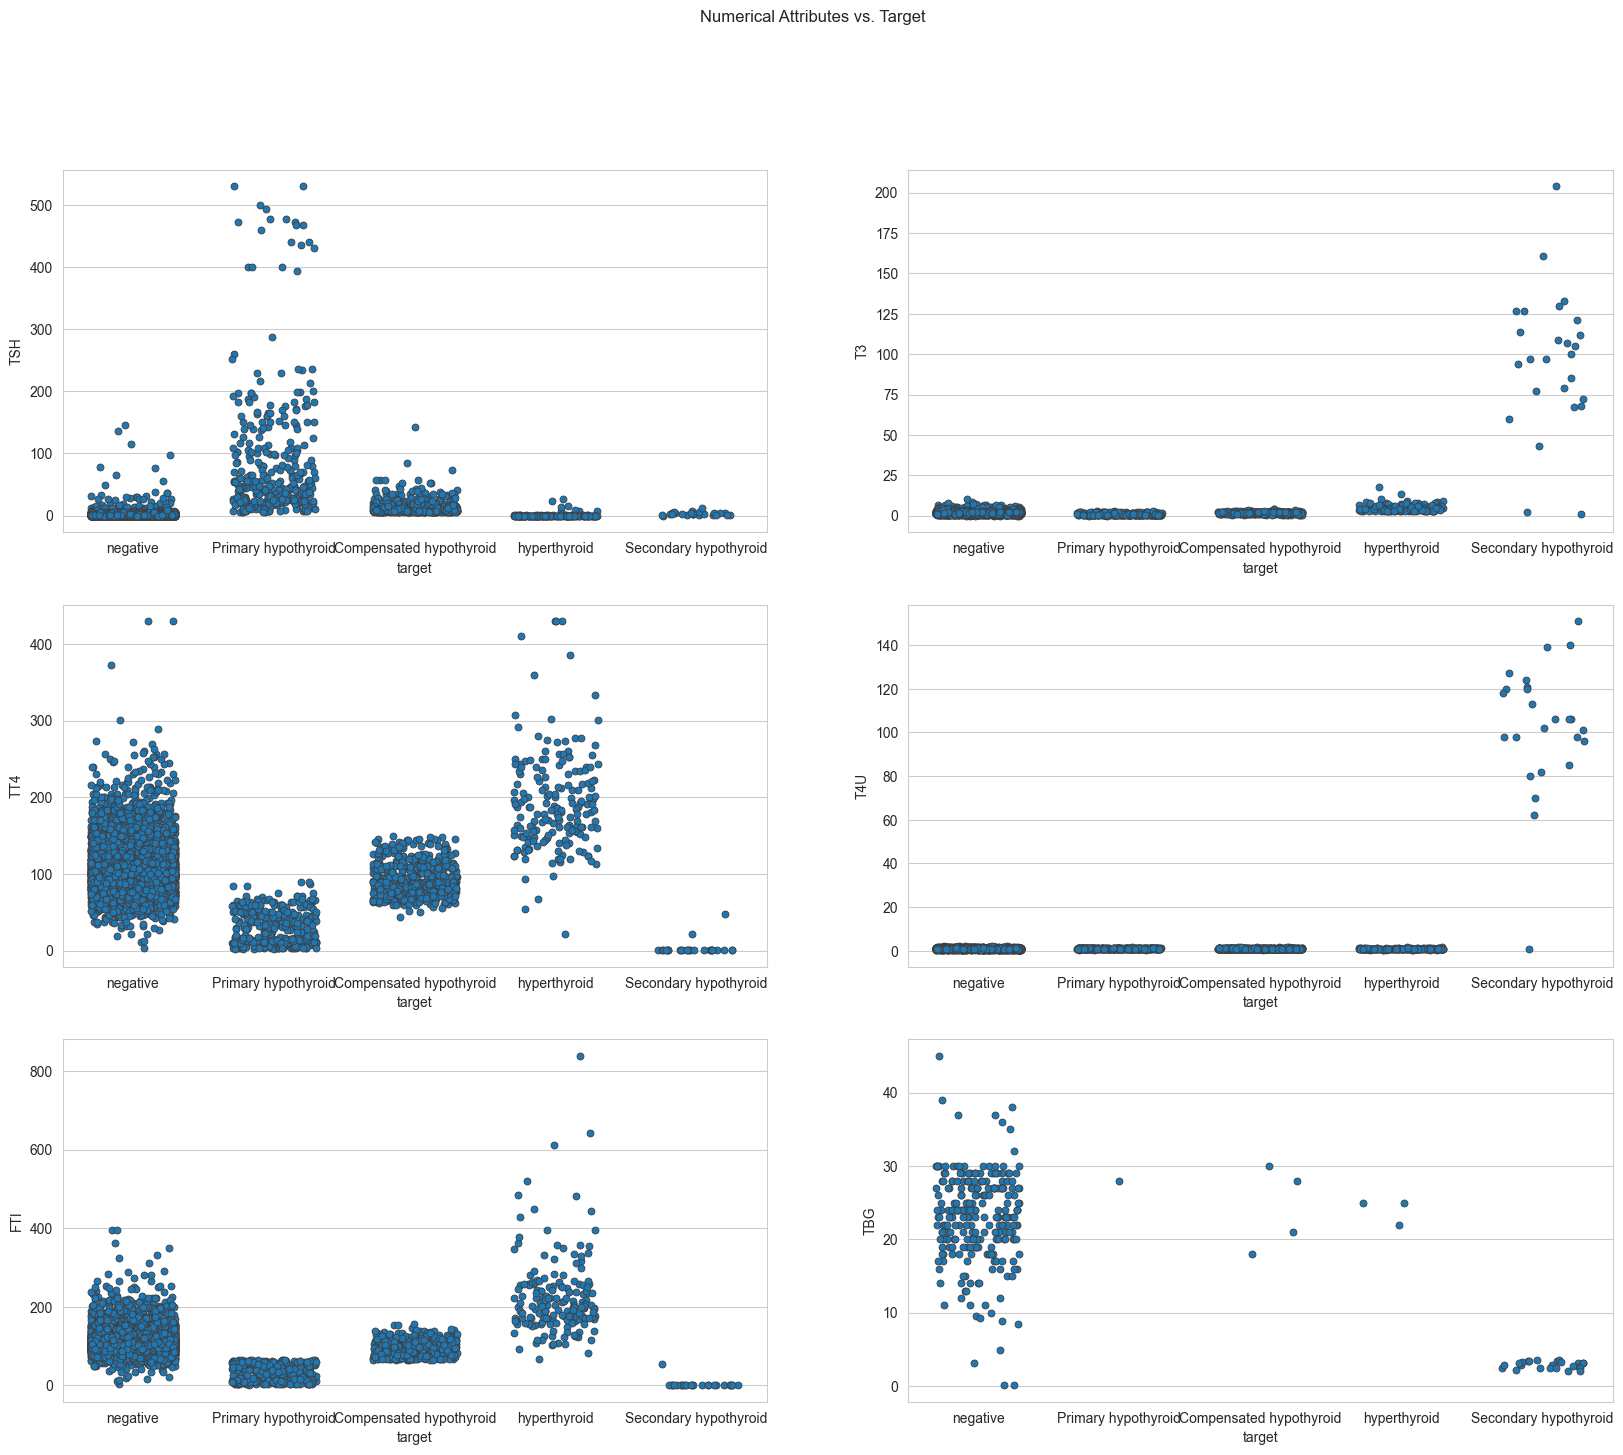

In [282]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

plt.show()

In [283]:
# inspecting observations with age > 100
thyroid[thyroid.age > 100]

# changing age of observations with ('age' > 100) to null
thyroid['age'] = np.where((thyroid.age > 100), np.nan, thyroid.age)

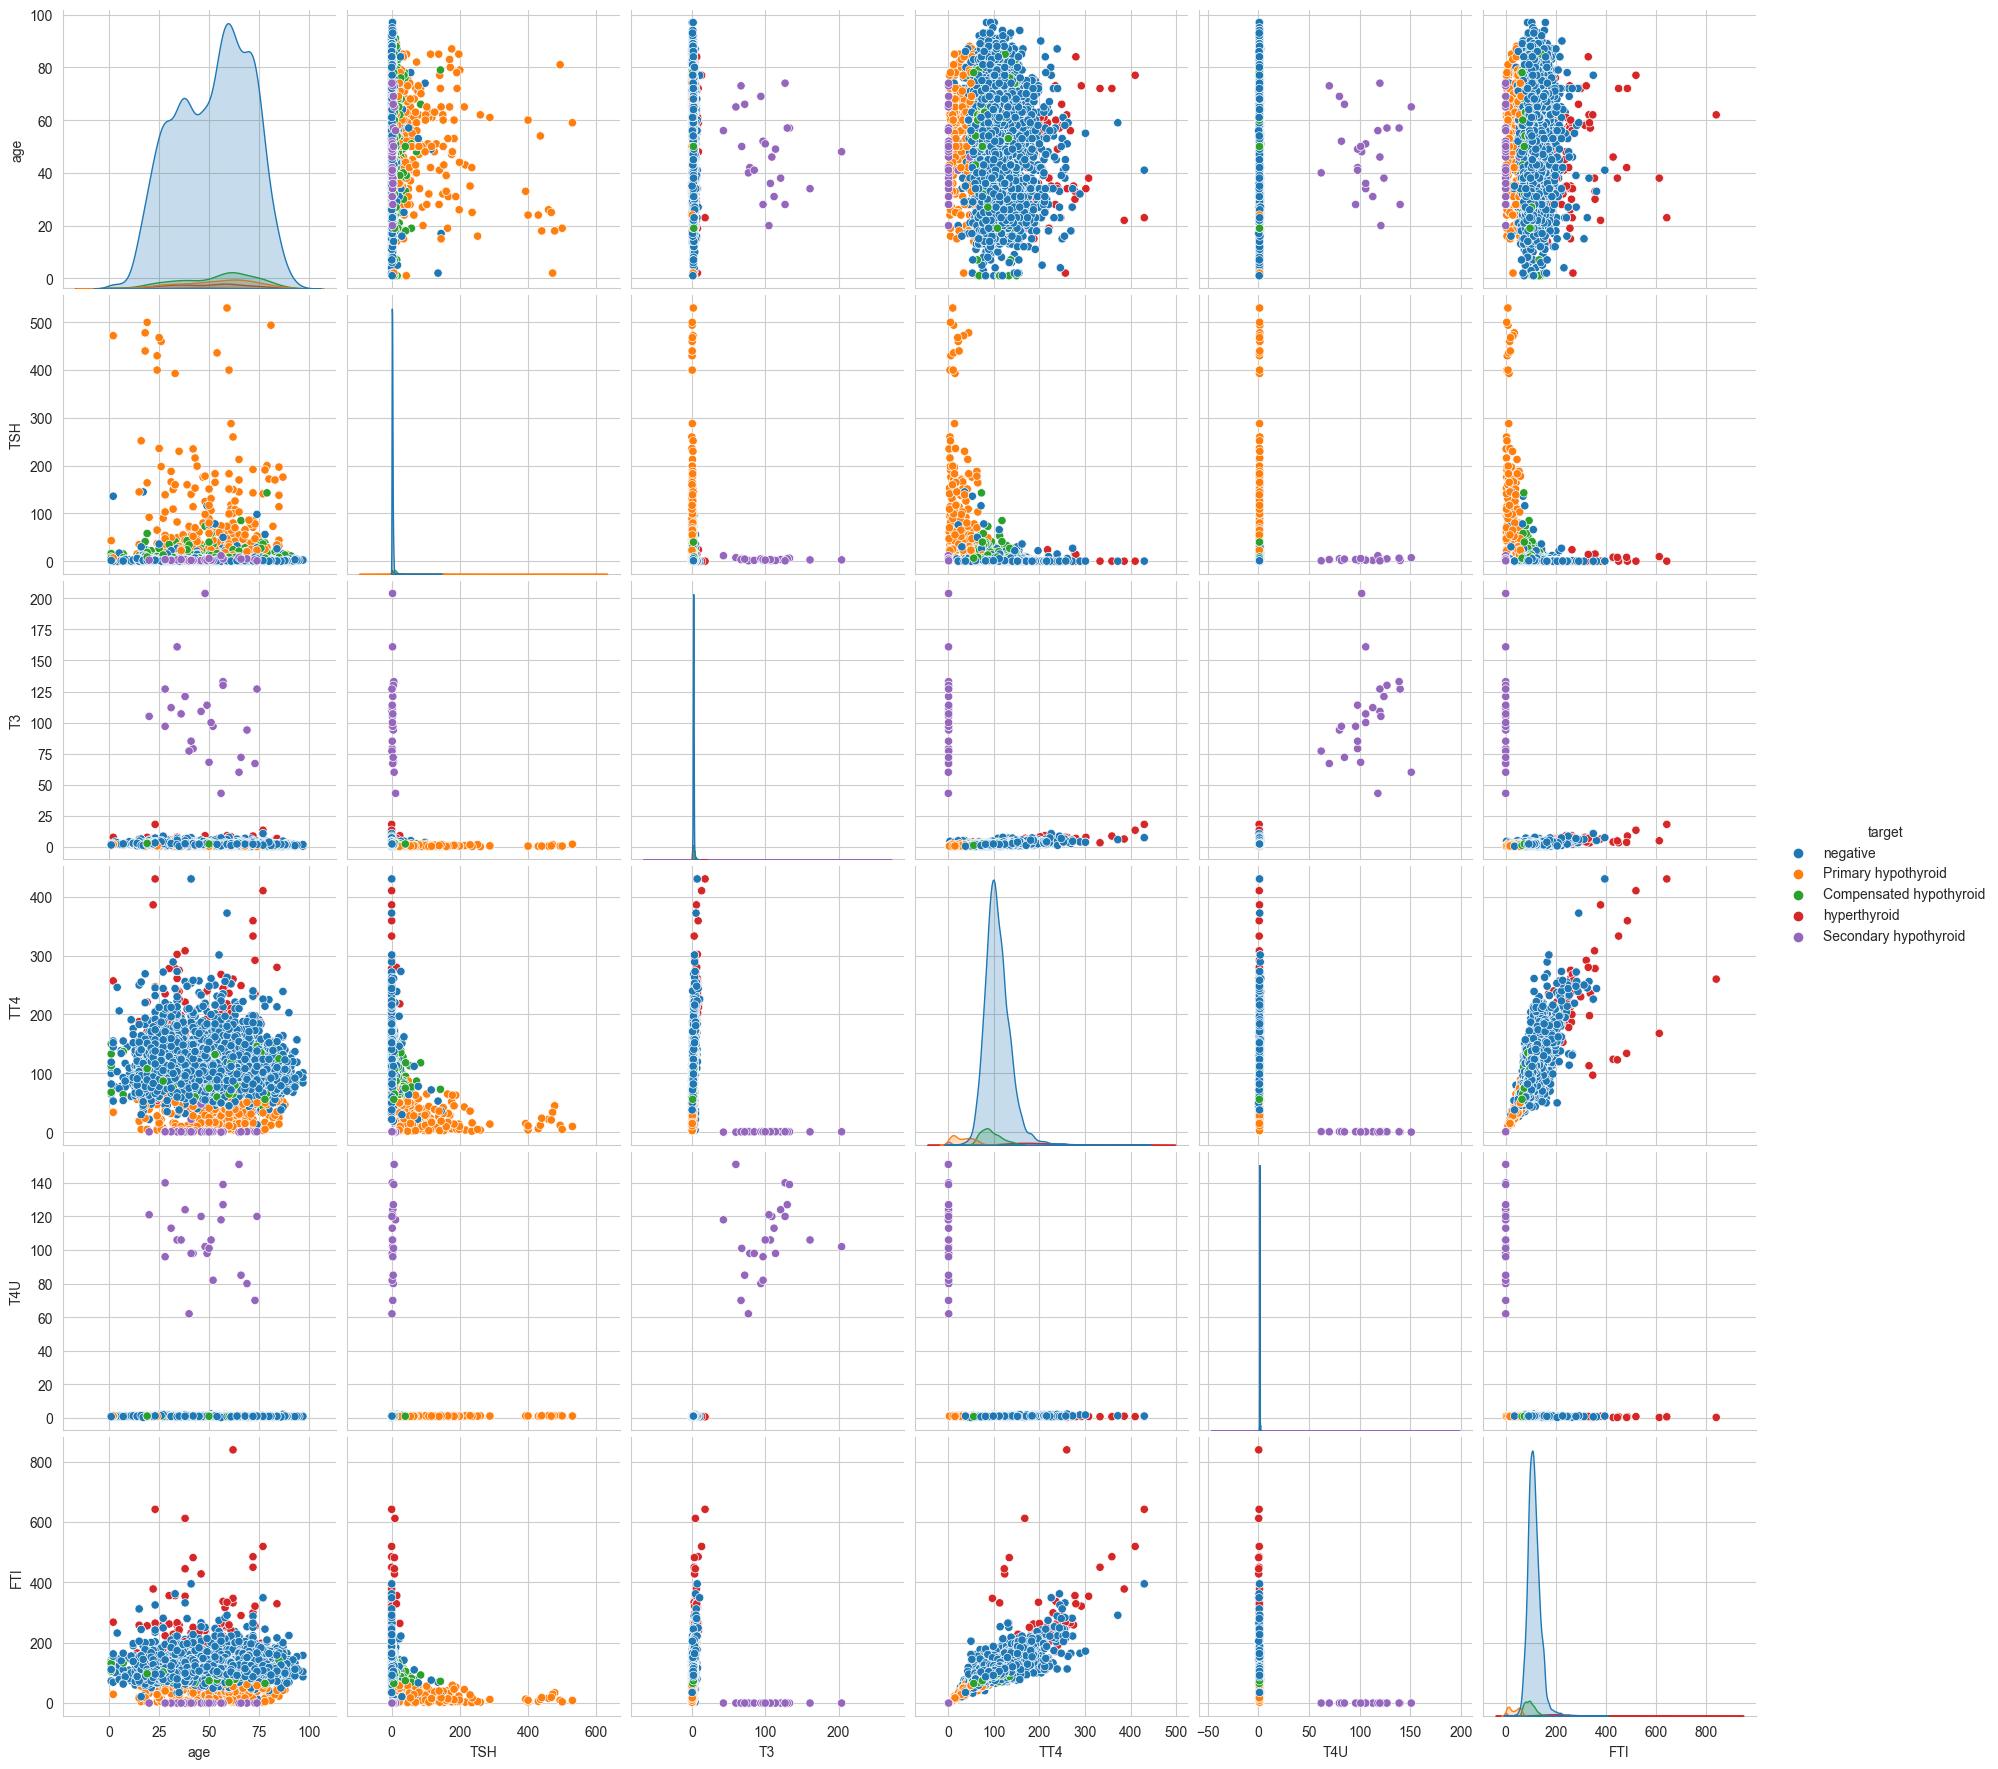

In [284]:
numerical_columns = thyroid[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(numerical_columns, hue='target', height=3);
plt.show()

C:\Users\vedav\AppData\Local\Temp\ipykernel_26328\4117295069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(thyroid.corr())
C:\Users\vedav\AppData\Local\Temp\ipykernel_26328\4117295069.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  thyroid_corr_heatmap = sns.heatmap(thyroid.corr(), annot=True)


          age       TSH        T3       TT4       T4U       FTI       TBG
age  1.000000 -0.036259 -0.042968 -0.030729 -0.016191  0.031602  0.055143
TSH -0.036259  1.000000 -0.028666 -0.298805 -0.000354 -0.313899  0.151513
T3  -0.042968 -0.028666  1.000000 -0.074495  0.936199 -0.096292 -0.839660
TT4 -0.030729 -0.298805 -0.074495  1.000000 -0.134555  0.793955  0.734684
T4U -0.016191 -0.000354  0.936199 -0.134555  1.000000 -0.153249 -0.887528
FTI  0.031602 -0.313899 -0.096292  0.793955 -0.153249  1.000000  0.664412
TBG  0.055143  0.151513 -0.839660  0.734684 -0.887528  0.664412  1.000000


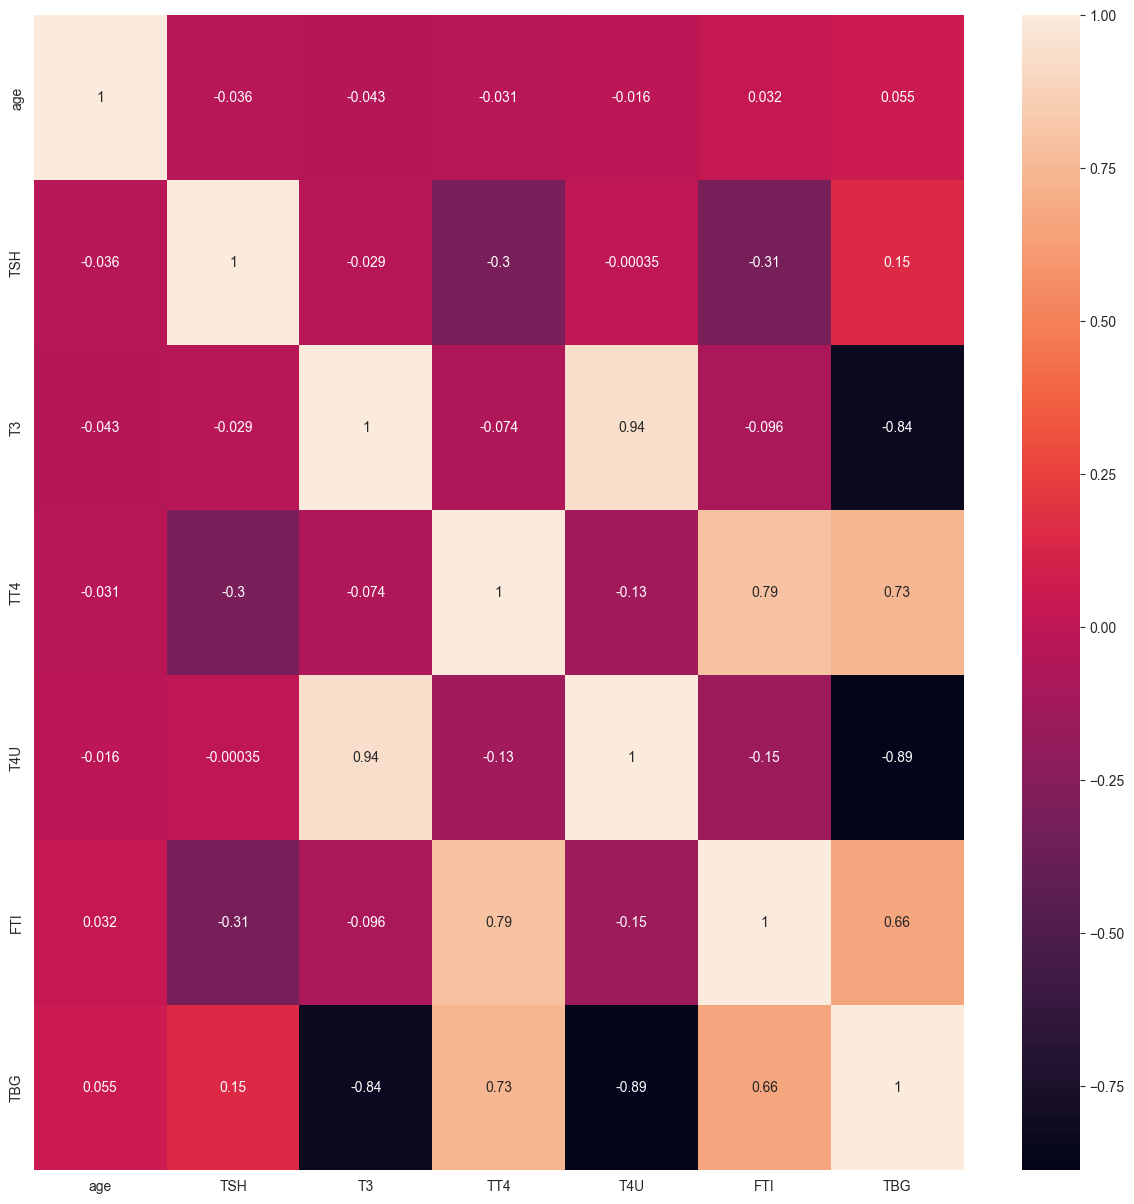

In [285]:
print(thyroid.corr())

# plotting correlation heatmap
plt.figure(figsize = [15,15])
thyroid_corr_heatmap = sns.heatmap(thyroid.corr(), annot=True)
plt.show()

### 3.3) Investigating Outliers

## TSH

In [286]:
Q1_TSH = thyroid['TSH'].quantile(0.25)
Q3_TSH = thyroid['TSH'].quantile(0.75)
IQR_TSH = Q3_TSH - Q1_TSH
under_TSH = thyroid['TSH'] < (Q1_TSH - 3 * IQR_TSH)
upper_TSH = thyroid['TSH'] > (Q3_TSH + 3 * IQR_TSH)
print('TSH:', 'lower outliers -', sum(under_TSH), ' | upper outliers -', sum(upper_TSH))


TSH: lower outliers - 0  | upper outliers - 686


## T3

In [287]:
Q1_T3 = thyroid['T3'].quantile(0.25)
Q3_T3 = thyroid['T3'].quantile(0.75)
IQR_T3 = Q3_T3 - Q1_T3
under_T3 = thyroid['T3'] < (Q1_T3 - 3 * IQR_T3)
upper_T3 = thyroid['T3'] > (Q3_T3 + 3 * IQR_T3)
print('T3:', 'lower outliers -', sum(under_T3), ' | upper outliers -', sum(upper_T3))

T3: lower outliers - 0  | upper outliers - 155


## TT4

In [288]:
Q1_TT4 = thyroid['TT4'].quantile(0.25)
Q3_TT4 = thyroid['TT4'].quantile(0.75)
IQR_TT4 = Q3_TT4 - Q1_TT4
under_TT4 = thyroid['TT4'] < (Q1_TT4 - 3 * IQR_TT4)
upper_TT4 = thyroid['TT4'] > (Q3_TT4 + 3 * IQR_TT4)
print('TT4:', 'lower outliers -', sum(under_TT4), ' | upper outliers -', sum(upper_TT4))

TT4: lower outliers - 0  | upper outliers - 84


## T4U

In [289]:
Q1_T4U = thyroid['T4U'].quantile(0.25)
Q3_T4U = thyroid['T4U'].quantile(0.75)
IQR_T4U = Q3_T4U - Q1_T4U
under_T4U = thyroid['T4U'] < (Q1_T4U - 3 * IQR_T4U)
upper_T4U = thyroid['T4U'] > (Q3_T4U + 3 * IQR_T4U)
print('T4U:', 'lower outliers -', sum(under_T4U), ' | upper outliers -', sum(upper_T4U))

T4U: lower outliers - 3  | upper outliers - 80


## FTI

In [290]:
Q1_FTI = thyroid['FTI'].quantile(0.25)
Q3_FTI = thyroid['FTI'].quantile(0.75)
IQR_FTI = Q3_FTI - Q1_FTI
under_FTI = thyroid['FTI'] < (Q1_FTI - 3 * IQR_FTI)
upper_FTI = thyroid['FTI'] > (Q3_FTI + 3 * IQR_FTI)
print('FTI:', 'lower outliers -', sum(under_FTI), ' | upper outliers -', sum(upper_FTI))

FTI: lower outliers - 0  | upper outliers - 112


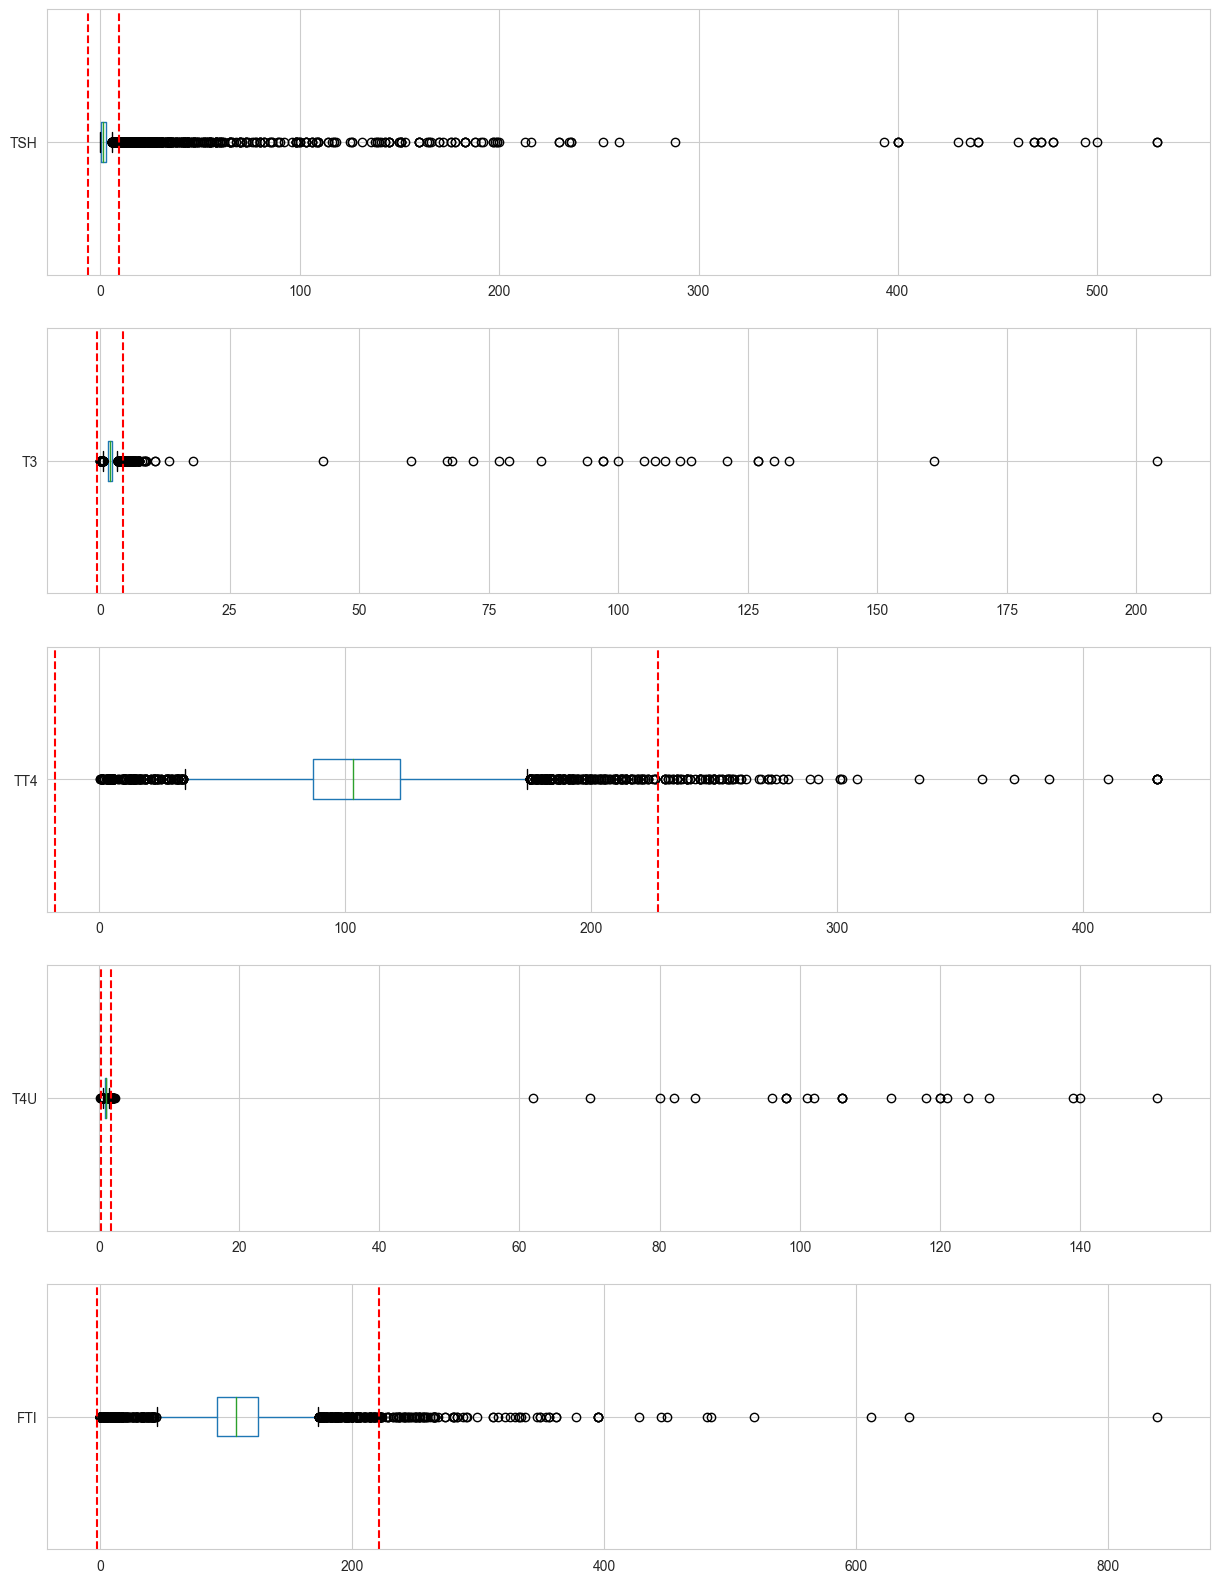

In [291]:
# preparing boxplots
fig, axs= plt.subplots(nrows = 5, figsize=(15,20))

# TSH
thyroid.boxplot(column='TSH', ax=axs[0], vert = False)
axs[0].axvline(x=(Q1_TSH - 3*IQR_TSH), color='r', linestyle='--')
axs[0].axvline(x=(Q3_TSH + 3*IQR_TSH), color='r', linestyle='--')

# T3
thyroid.boxplot(column='T3', ax=axs[1], vert = False)
axs[1].axvline(x=(Q1_T3 - 3*IQR_T3), color='r', linestyle='--')
axs[1].axvline(x=(Q3_T3 + 3*IQR_T3), color='r', linestyle='--')

# TT4
thyroid.boxplot(column='TT4', ax=axs[2], vert = False)
axs[2].axvline(x=(Q1_TT4 - 3*IQR_TT4), color='r', linestyle='--')
axs[2].axvline(x=(Q3_TT4 + 3*IQR_TT4), color='r', linestyle='--')

# T4U
thyroid.boxplot(column='T4U', ax=axs[3], vert = False)
axs[3].axvline(x=(Q1_T4U - 3*IQR_T4U), color='r', linestyle='--')
axs[3].axvline(x=(Q3_T4U + 3*IQR_T4U), color='r', linestyle='--')

# FTI
thyroid.boxplot(column='FTI', ax=axs[4], vert = False)
axs[4].axvline(x=(Q1_FTI - 3*IQR_FTI), color='r', linestyle='--')
axs[4].axvline(x=(Q3_FTI + 3*IQR_FTI), color='r', linestyle='--')

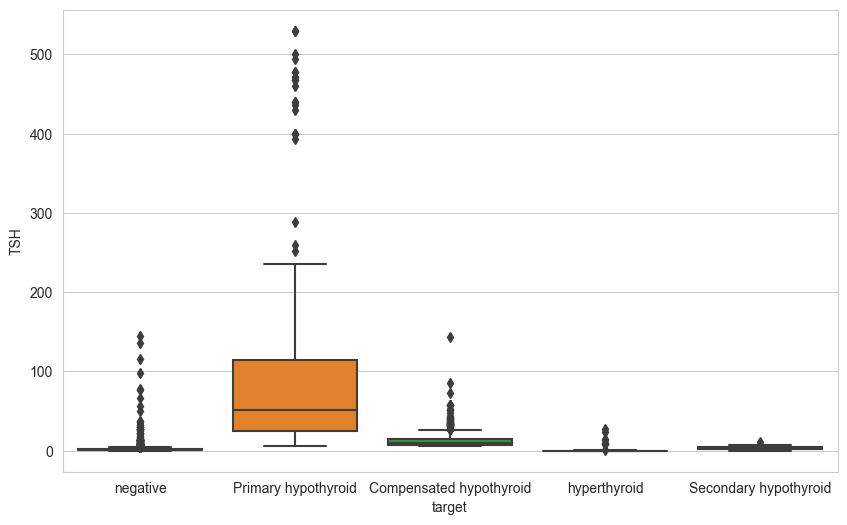

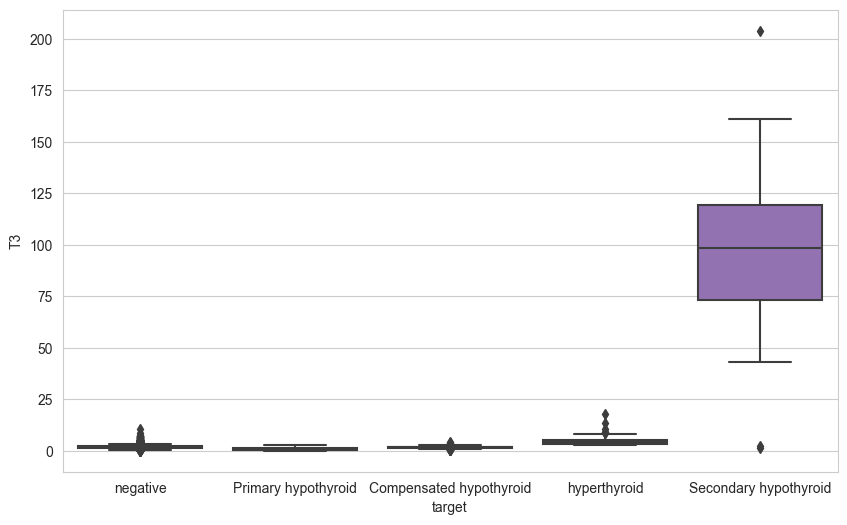

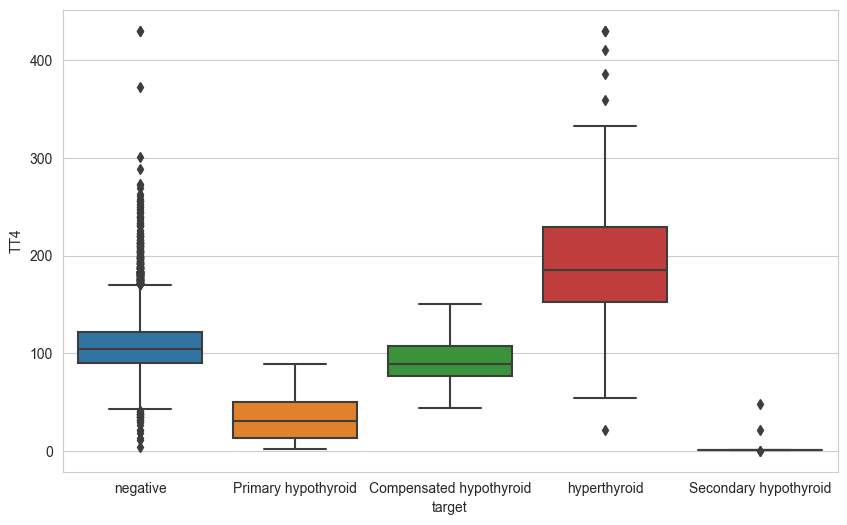

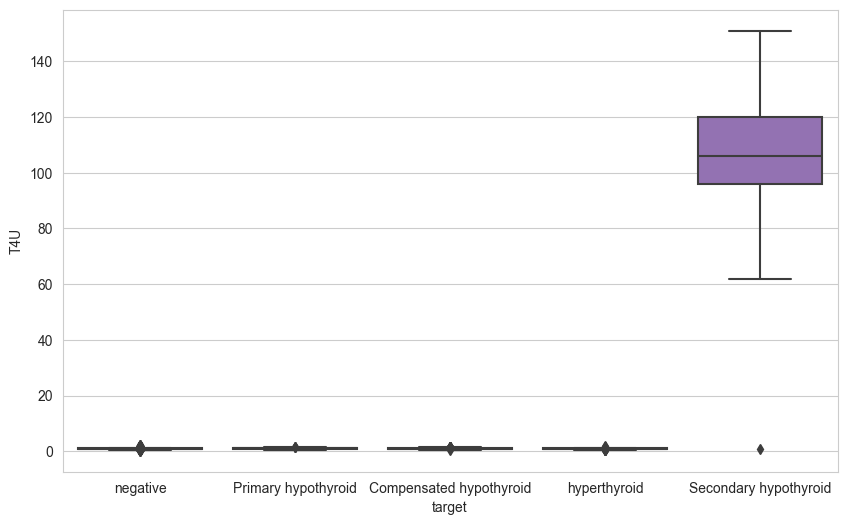

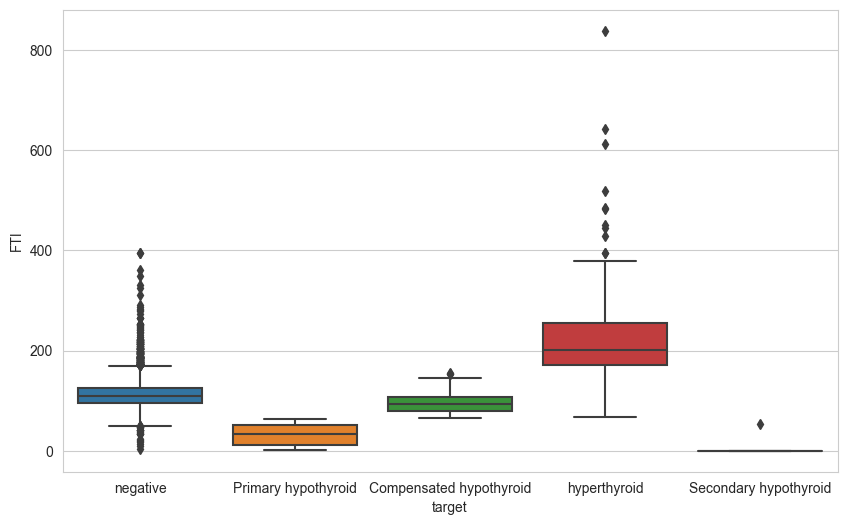

In [292]:
plt.figure(figsize = [10,6])
sns.boxplot(x="target",
                y="TSH",
                data=thyroid)
plt.show()

plt.figure(figsize = [10,6])
sns.boxplot(x="target",
                y="T3",
                data=thyroid)
plt.show()

plt.figure(figsize = [10,6])
sns.boxplot(x="target",
                y="TT4",
                data=thyroid)
plt.show()

plt.figure(figsize = [10,6])
sns.boxplot(x="target",
                y="T4U",
                data=thyroid)
plt.show()

plt.figure(figsize = [10,6])
sns.boxplot(x="target",
                y="FTI",
                data=thyroid)
plt.show()

In [293]:
thyroid['sex'] = thyroid['sex'].map({'F' : 0, 'M' : 1})

In [294]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,TBG,target
0,29.0,0.0,f,f,f,f,f,f,t,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,negative
1,29.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,negative
2,41.0,0.0,f,f,f,f,f,f,f,t,f,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,negative
3,36.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,negative
5,60.0,0.0,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,negative


In [295]:
thyroid[['on_thyroxine','on_antithyroid_meds','pregnant','thyroid_surgery','tumor']] = thyroid[['on_thyroxine','on_antithyroid_meds','pregnant','thyroid_surgery','tumor']].replace({'f' : 0, 't' : 1})

In [296]:
thyroid['sex'].fillna(thyroid['sex'].median(), inplace=True)
thyroid['TT4'].fillna(thyroid['TT4'].median(), inplace=True)
thyroid['T4U'].fillna(thyroid['T4U'].median(), inplace=True)
thyroid['FTI'].fillna(thyroid['FTI'].median(), inplace=True)

In [297]:
thyroid['TSH'].fillna(thyroid['TSH'].median(), inplace=True)
thyroid['T3'].fillna(thyroid['T3'].median(), inplace=True)

In [298]:
thyroid.isnull().sum()

age                        6
sex                        0
on_thyroxine               0
query_on_thyroxine         0
on_antithyroid_meds        0
pregnant                   0
thyroid_surgery            0
I131_treatment             0
query_hypothyroid          0
query_hyperthyroid         0
lithium                    0
goitre                     0
tumor                      0
hypopituitary              0
TSH                        0
T3                         0
TT4                        0
T4U                        0
FTI                        0
TBG                    11059
target                     0
dtype: int64

In [299]:
thyroid.drop(['TBG'], axis=1, inplace=True)

In [300]:
thyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

In [301]:
thyroid.dropna(subset=['age'],inplace=True)

In [302]:
thyroid.drop(['query_on_thyroxine','I131_treatment','query_hypothyroid','query_hyperthyroid', 'lithium', 'goitre','hypopituitary'],axis=1,inplace=True)

In [303]:
thyroid

,age,sex,on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,tumor,TSH,T3,TT4,T4U,FTI,target
0,29.0,0.0,0,0,0,0,0,0.3,2.0,103.00,0.97,108.0,negative
1,29.0,0.0,0,0,0,0,0,1.6,1.9,128.00,0.97,108.0,negative
2,41.0,0.0,0,0,0,0,0,1.4,2.0,103.00,0.97,108.0,negative
3,36.0,0.0,0,0,0,0,0,1.4,2.0,103.00,0.97,108.0,negative
5,60.0,0.0,0,0,0,0,0,1.4,2.0,103.00,0.97,108.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,51.0,0.0,0,0,0,0,0,2.2,100.0,0.94,106.00,0.0,Secondary hypothyroid
12964,50.0,0.0,0,0,0,0,0,5.5,68.0,0.67,101.00,0.0,Secondary hypothyroid
12965,73.0,0.0,0,0,0,0,0,3.3,67.0,0.96,70.00,0.0,Secondary hypothyroid
12966,66.0,0.0,0,0,0,0,0,4.4,72.0,0.85,85.00,0.0,Secondary hypothyroid


In [306]:
thyroid.to_csv("Cleaned_thyroid_file.csv")

In [307]:
thyroid.target.value_counts()

negative                   10246
Compensated hypothyroid      553
Primary hypothyroid          329
hyperthyroid                 182
Secondary hypothyroid         26
Name: target, dtype: int64

In [308]:
thyroid['target'] = thyroid['target'].map({'negative' : 0, 'hyperthyroid' : 1,'Primary hypothyroid':2,'Compensated hypothyroid':3,'Secondary hypothyroid':4})

### 3.4) Feature Selection.

In [309]:
X = thyroid.drop(columns = ['target'], axis = 1)
Y = thyroid['target']

In [310]:
X.shape

(11336, 12)

In [311]:
Y.shape

(11336,)

## 4.) Spliting the Data:

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=42, stratify=Y)

In [313]:
print(X_train.shape,X_test.shape)

(9068, 12) (2268, 12)


In [314]:
print(Y_train.shape,Y_test.shape)

(9068,) (2268,)


## 5.) Model Selection & Prediction:
## { 1. } Logistic Regression:-

**Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.**


In [322]:
#Implementing Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

modelLogistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
modelLogistic.fit(X_train,Y_train)

C:\Users\vedav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [323]:
Y_pred= modelLogistic.predict(X_test)

In [324]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(Y_test, Y_pred)
print(ConfusionMatrix)

[[2029    6    3   12    0]
 [  33    3    0    0    0]
 [   4    0   54    7    1]
 [  53    0    3   55    0]
 [   1    0    0    0    4]]


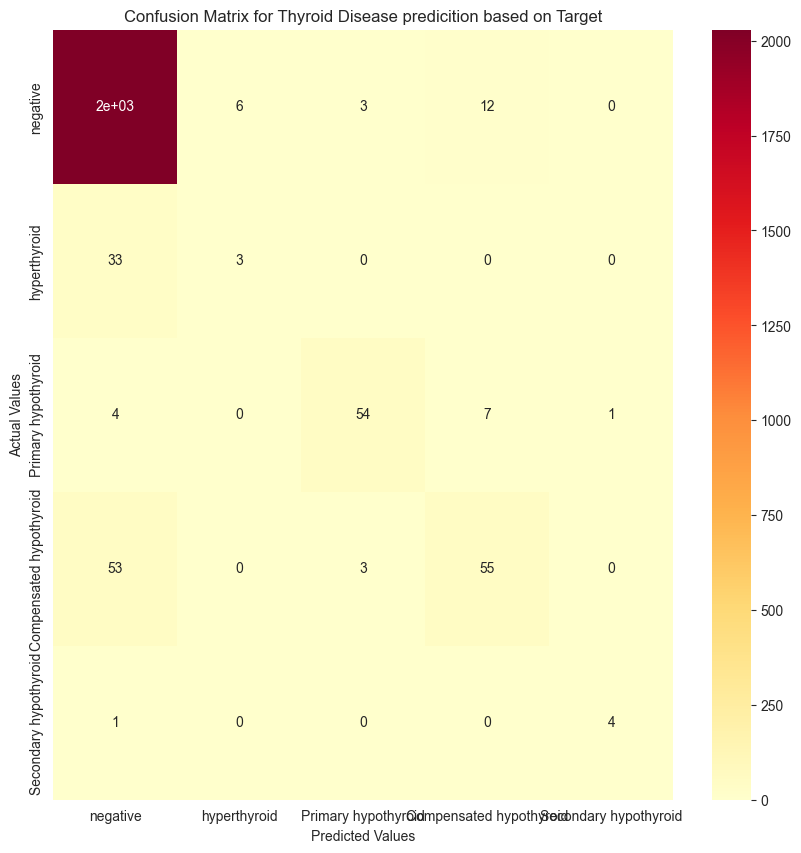

In [325]:
plt.figure(figsize = [10,10])
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='YlOrRd')
ax.set_title('Confusion Matrix for Thyroid Disease predicition based on Target')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values' )
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['negative','hyperthyroid','Primary hypothyroid','Compensated hypothyroid','Secondary hypothyroid'])
ax.yaxis.set_ticklabels(['negative','hyperthyroid','Primary hypothyroid','Compensated hypothyroid','Secondary hypothyroid'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [326]:
from sklearn.metrics import accuracy_score
acc_log=accuracy_score(Y_test, Y_pred)*100
print("Accuracy is : ",acc_log)

Accuracy is :  94.57671957671958


In [327]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_log = precision_score(Y_test, Y_pred,average='weighted')
rec_log = recall_score(Y_test, Y_pred,average='weighted')
f1_log= f1_score(Y_test, Y_pred,average='weighted')

In [328]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2050
           1       0.33      0.08      0.13        36
           2       0.90      0.82      0.86        66
           3       0.74      0.50      0.59       111
           4       0.80      0.80      0.80         5

    accuracy                           0.95      2268
   macro avg       0.75      0.64      0.67      2268
weighted avg       0.93      0.95      0.94      2268



## { 2. } Support Vector Machine:-

In [329]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train,Y_train)

SVC(random_state=42)

In [330]:
Y_pred_1 = classifier.predict(X_test)

In [331]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_1)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2039    4    1    6    0]
 [  26   10    0    0    0]
 [   9    0   57    0    0]
 [  81    0    1   29    0]
 [   1    0    0    0    4]]


In [332]:
acc_svm=accuracy_score(Y_test, Y_pred_1)*100
print ("Accuracy : ", acc_svm)

Accuracy :  94.31216931216932


In [333]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_svm = precision_score(Y_test, Y_pred_1,average='weighted')
rec_svm = recall_score(Y_test, Y_pred_1,average='weighted')
f1_svm= f1_score(Y_test, Y_pred_1,average='weighted')

In [334]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2050
           1       0.71      0.28      0.40        36
           2       0.97      0.86      0.91        66
           3       0.83      0.26      0.40       111
           4       1.00      0.80      0.89         5

    accuracy                           0.94      2268
   macro avg       0.89      0.64      0.71      2268
weighted avg       0.94      0.94      0.93      2268



## { 3. } Random Forest:-

In [339]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier_1= RandomForestClassifier(n_estimators= 5,criterion="entropy")  
classifier_1.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [340]:
Y_pred_2= classifier_1.predict(X_test) 

In [341]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_2)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2033   14    0    3    0]
 [  23   13    0    0    0]
 [   3    0   61    2    0]
 [   1    0    0  110    0]
 [   1    0    0    0    4]]


In [342]:
acc_rf=accuracy_score(Y_test, Y_pred_2)*100
print ("Accuracy : ", acc_rf)

Accuracy :  97.92768959435627


In [343]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_rf = precision_score(Y_test, Y_pred_2,average='weighted')
rec_rf = recall_score(Y_test, Y_pred_2,average='weighted')
f1_rf= f1_score(Y_test, Y_pred_2,average='weighted')

In [344]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2050
           1       0.48      0.36      0.41        36
           2       1.00      0.92      0.96        66
           3       0.96      0.99      0.97       111
           4       1.00      0.80      0.89         5

    accuracy                           0.98      2268
   macro avg       0.88      0.81      0.84      2268
weighted avg       0.98      0.98      0.98      2268



## { 4. } Decision Tree:-

In [349]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [350]:
Y_pred_3 = model.predict(X_test)

In [351]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_3)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2030   18    0    2    0]
 [  22   13    0    1    0]
 [   1    0   63    2    0]
 [   1    0    0  110    0]
 [   1    0    0    0    4]]


In [352]:
acc_dt=accuracy_score(Y_test, Y_pred_3)*100
print ("Accuracy : ",acc_dt )

Accuracy :  97.88359788359789


In [353]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_dt = precision_score(Y_test, Y_pred_3,average='weighted')
rec_dt = recall_score(Y_test, Y_pred_3,average='weighted')
f1_dt= f1_score(Y_test, Y_pred_3,average='weighted')

In [354]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2050
           1       0.42      0.36      0.39        36
           2       1.00      0.95      0.98        66
           3       0.96      0.99      0.97       111
           4       1.00      0.80      0.89         5

    accuracy                           0.98      2268
   macro avg       0.87      0.82      0.84      2268
weighted avg       0.98      0.98      0.98      2268



## { 5. } Gradient Boosting:-

In [355]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [356]:
Y_pred_4 = gbc.predict(X_test)

In [357]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_4)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2033   15    0    2    0]
 [  17   19    0    0    0]
 [   1    0   63    2    0]
 [   2    0    0  109    0]
 [   1    0    0    0    4]]


In [358]:
acc_gb=accuracy_score(Y_test, Y_pred_4)*100
print ("Accuracy : ", acc_gb)

Accuracy :  98.2363315696649


In [359]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_gb = precision_score(Y_test, Y_pred_4,average='weighted')
rec_gb = recall_score(Y_test, Y_pred_4,average='weighted')
f1_gb = f1_score(Y_test, Y_pred_4,average='weighted')

In [360]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2050
           1       0.56      0.53      0.54        36
           2       1.00      0.95      0.98        66
           3       0.96      0.98      0.97       111
           4       1.00      0.80      0.89         5

    accuracy                           0.98      2268
   macro avg       0.90      0.85      0.87      2268
weighted avg       0.98      0.98      0.98      2268



## { 6. } MLP:-

In [372]:
from sklearn.neural_network import MLPClassifier # for classification
from sklearn.neural_network import MLPRegressor # for regression

mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500)

# Train the model
mlp.fit(X_train, Y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [373]:
y_pred = mlp.predict(X_test)

In [374]:
acc_mlp = accuracy_score(Y_test, y_pred)*100
print('Accuracy:', acc_mlp)

Accuracy: 97.17813051146385


In [375]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_mlp = precision_score(Y_test, y_pred,average='weighted')
rec_mlp = recall_score(Y_test, y_pred,average='weighted')
f1_mlp = f1_score(Y_test,y_pred,average='weighted')

In [376]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2050
           1       0.62      0.67      0.64        36
           2       0.94      0.71      0.81        66
           3       0.84      0.92      0.88       111
           4       1.00      0.80      0.89         5

    accuracy                           0.97      2268
   macro avg       0.88      0.82      0.84      2268
weighted avg       0.97      0.97      0.97      2268



##  Comparision of algorithms:-

[94.57671957671958,
 94.31216931216932,
 97.92768959435627,
 97.88359788359789,
 98.2363315696649,
 97.17813051146385]

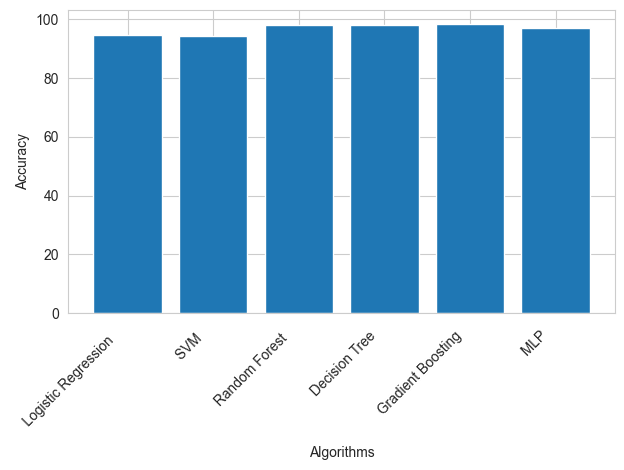

In [377]:
accuracy=[]
accuracy.append(acc_log)
accuracy.append(acc_svm)
accuracy.append(acc_rf)
accuracy.append(acc_dt)
accuracy.append(acc_gb)
accuracy.append(acc_mlp)
algorithms=['    Logistic Regression    ','  SVM   ','   Random Forest   ','   Decision Tree  ','  Gradient Boosting  ','  MLP  ']
plt.bar(algorithms,accuracy)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
accuracy

In [378]:
accuracy_dict = {
                "Logistic Regression":acc_log,
                 "Support Vector Machine":acc_svm,
                "Random Forest": acc_rf,
                "Decision Trees": acc_dt, 
                "Gradient Boosting":acc_gb,
                "Multi Layer Perceptron": acc_mlp
               
}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,94.576720
Support Vector Machine,94.312169
Random Forest,97.927690
Decision Trees,97.883598
Gradient Boosting,98.236332
Multi Layer Perceptron,97.178131


In [379]:
results_fullset = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
model_result = pd.DataFrame([['Logistic Regression', acc_log/100, rec_log, prec_log, f1_log],
                             ['SVM', acc_svm/100, rec_svm, prec_svm, f1_svm],
                             ['Random Forest', acc_rf/100, rec_rf, prec_rf, f1_rf],
                             ['Decision Tree', acc_dt/100,rec_dt, prec_dt, f1_dt],
                             ['Gradient Boosting', acc_gb/100, rec_gb, prec_gb, f1_gb],
                             ['MLP', acc_mlp/100, rec_mlp, prec_mlp, f1_mlp]],
               columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_result,ignore_index = True)
results_fullset

C:\Users\vedav\AppData\Local\Temp\ipykernel_26328\3920271353.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_fullset = results_fullset.append(model_result,ignore_index = True)


,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.945767,0.945767,0.934702,0.937527
1,SVM,0.943122,0.943122,0.937037,0.930664
2,Random Forest,0.979277,0.979277,0.977362,0.978094
3,Decision Tree,0.978836,0.978836,0.977659,0.978157
4,Gradient Boosting,0.982363,0.982363,0.982024,0.982142
5,MLP,0.971781,0.971781,0.972679,0.971636
